Лабораторная работа №4. Основы нейронных сетей
Общее задание
Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск

1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.
2. Произвести масштабирование признаков (scaling).
3. С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков. Пример MLPClassifier Пример и описание Perceptron
4. Проверить точность модели по тестовой выборке.
5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


# Загрузка данных
data_url = "letter-recognition.data"
column_names = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(data_url, header=None, names=column_names)

# Посмотрим на первые несколько строк данных
print(data.head())


  letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      T      2      8      3     5      1      8     13      0      6      6   
1      I      5     12      3     7      2     10      5      5      4     13   
2      D      4     11      6     8      6     10      6      2      6     10   
3      N      7     11      6     6      3      5      9      4      6      4   
4      G      2      1      3     1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10  


1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.

In [2]:
# Разделение на признаки (X) и целевую переменную (y)
X = data.drop('letter', axis=1)  # Признаки, все столбцы кроме 'letter'
y = data['letter']  # Целевая переменная, столбец 'letter'

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state определяет начальное состояние генератора псевдослучайных чисел

# Проверим размерности полученных выборок
print("Размер обучающей выборки (X_train):", X_train.shape) #возвращает кортеж, содержащий количество строк и столбцов в DF
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки (y_train):", y_train.shape)
print("Размер тестовой выборки (y_test):", y_test.shape)


Размер обучающей выборки (X_train): (16000, 16)
Размер тестовой выборки (X_test): (4000, 16)
Размер обучающей выборки (y_train): (16000,)
Размер тестовой выборки (y_test): (4000,)


2. Произвести масштабирование признаков (scaling).

In [3]:
# Создаем объект StandardScaler
scaler = StandardScaler()

# Масштабируем признаки обучающей выборки
X_train_scaled = scaler.fit_transform(X_train)

# Применяем ту же самую стандартизацию к признакам тестовой выборки
X_test_scaled = scaler.transform(X_test)


3. С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков. Пример MLPClassifier Пример и описание Perceptron

4. Проверить точность модели по тестовой выборке.

In [4]:

# Обучение модели Perceptron
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train_scaled, y_train)

# Обучение модели MLPClassifier
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_perceptron = perceptron_model.predict(X_test_scaled)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Оценка точности моделей
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Точность модели Perceptron на тестовой выборке:", accuracy_perceptron)
print("Точность модели MLPClassifier на тестовой выборке:", accuracy_mlp)

Точность модели Perceptron на тестовой выборке: 0.50175
Точность модели MLPClassifier на тестовой выборке: 0.95575


c:\Users\Ktulh\OneDrive\Рабочий стол\Хайрулин\ЛР_1-5_ИВТАПБ-41_Меховников\lab4\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


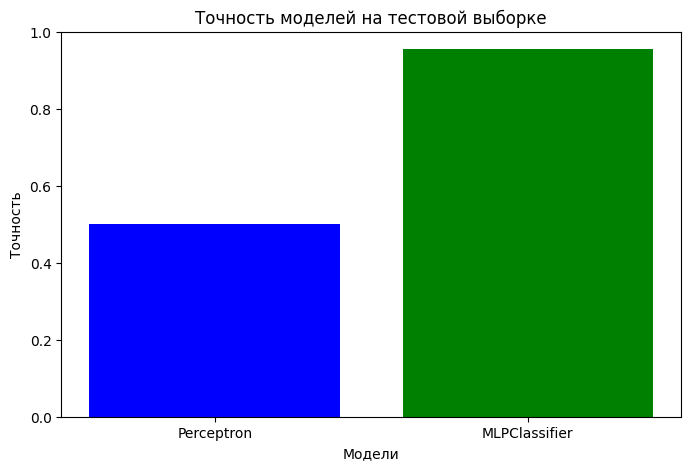

In [5]:
# Список моделей и их точности
models = ['Perceptron', 'MLPClassifier']
accuracies = [accuracy_perceptron, accuracy_mlp]

# Построение графика
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Модели')
plt.ylabel('Точность')
plt.title('Точность моделей на тестовой выборке')
plt.ylim(0, 1)  # Ограничиваем ось y от 0 до 1
plt.show()


5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

Наилучший коэффициент обучения для Perceptron: 0.78
Точность Perceptron с наилучшим коэффициентом обучения: 0.503
Наилучший коэффициент обучения для MLPClassifier: 0.01
Точность MLPClassifier с наилучшим коэффициентом обучения: 0.9505


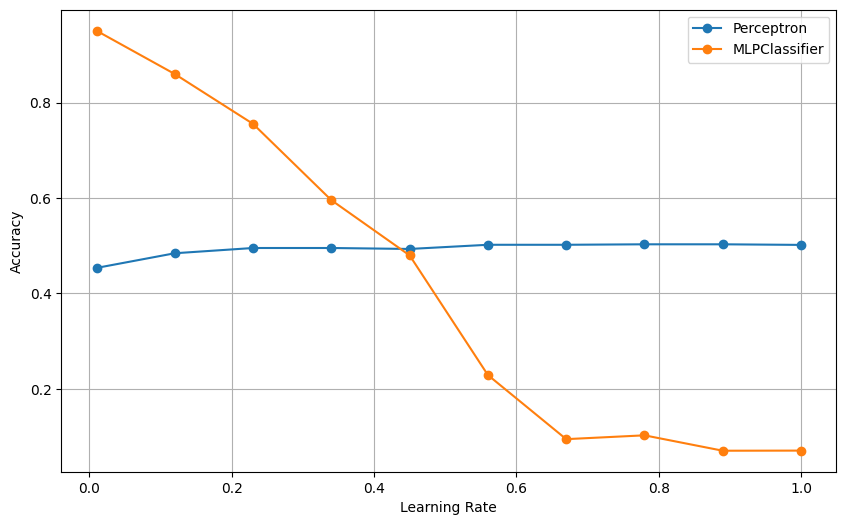

In [6]:
# Загрузка данных
data = pd.read_csv('letter-recognition.data', header=None)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определение параметров для экспериментов
count_tests = 10
learning_rate_list = np.linspace(0.01, 1, count_tests)
alpha = 0.0001 #для ridge
solver = 'adam' # алрогритм оптимизации. является комбинацией двух других методов оптимизации - адаптивного градиентного спуска (Adagrad) и стохастического градиентного спуска с моментом (SGD с моментом). 

# Инициализация списков для хранения точности
perceptron_scores = []
mlp_scores = []

# Градиентный спуск, метод градиентного спуска — численный метод нахождения 
# локального минимума или максимума функции с помощью движения вдоль градиента, 
# один из основных численных методов современной оптимизации.

# Проведение экспериментов
for lr in learning_rate_list:
    # Обучение модели Perceptron
    perceptron_model = Perceptron(eta0=lr, random_state=42) # обозначает начальную скорость обучения, которая определяет размер шага, с которым алгоритм перемещается по функции потерь
    perceptron_model.fit(X_train_scaled, y_train)
    y_pred_perceptron = perceptron_model.predict(X_test_scaled)
    perceptron_scores.append(accuracy_score(y_test, y_pred_perceptron))

    # Обучение модели MLPClassifier
    mlp_model = MLPClassifier(learning_rate_init=lr, alpha=alpha, solver=solver, random_state=42, max_iter=1000)
    # Во время обучения нейронной сети скорость обучения определяет, насколько большие шаги делаются в направлении минимизации функции потерь
    mlp_model.fit(X_train_scaled, y_train)
    y_pred_mlp = mlp_model.predict(X_test_scaled)
    mlp_scores.append(accuracy_score(y_test, y_pred_mlp))

# Определение наилучшего коэффициента обучения
best_lr_perceptron = learning_rate_list[np.argmax(perceptron_scores)]
best_lr_mlp = learning_rate_list[np.argmax(mlp_scores)]

print("Наилучший коэффициент обучения для Perceptron:", best_lr_perceptron)
print("Точность Perceptron с наилучшим коэффициентом обучения:", max(perceptron_scores))
print("Наилучший коэффициент обучения для MLPClassifier:", best_lr_mlp)
print("Точность MLPClassifier с наилучшим коэффициентом обучения:", max(mlp_scores))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_list, perceptron_scores, label='Perceptron', marker='o')
plt.plot(learning_rate_list, mlp_scores, label='MLPClassifier', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\Ktulh\OneDrive\Рабочий стол\Хайрулин\ЛР_1-5_ИВТАПБ-41_Меховников\lab4\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Ktulh\OneDrive\Рабочий стол\Хайрулин\ЛР_1-5_ИВТАПБ-41_Меховников\lab4\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ktulh\OneDrive\Рабочий стол\Хайрулин\ЛР_1-5_ИВТАПБ-41_Меховников\lab4\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

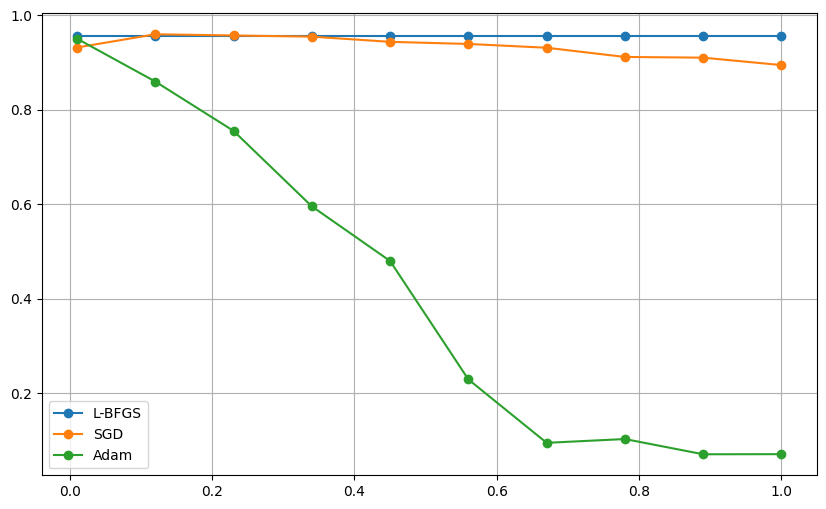

Оценки производительности модели MLPClassifier с LBFGS: [0.956, 0.956, 0.956, 0.956, 0.956, 0.956, 0.956, 0.956, 0.956, 0.956]
Оценки производительности модели MLPClassifier с SGD: [0.93175, 0.95975, 0.95725, 0.95475, 0.94375, 0.93925, 0.93125, 0.91175, 0.91025, 0.8945]
Оценки производительности модели MLPClassifier с Adam: [0.9505, 0.85975, 0.75525, 0.5955, 0.47975, 0.229, 0.09475, 0.10275, 0.0705, 0.07075]


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('letter-recognition.data', header=None)
X = data.iloc[:, 1:] #выбор всего кроме первого столбца
y = data.iloc[:, 0] #выбор первого столбца

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определение параметров для экспериментов
count_tests = 10
learning_rate_list = np.linspace(0.01, 1, count_tests)
alpha = 0.0001
max_iter = 100

# Инициализация списков для хранения точности
lbfgs_scores = []
sgd_scores = []
adam_scores = []

# Проведение экспериментов
for lr in learning_rate_list:
    # Обучение модели MLPClassifier с оптимизатором L-BFGS
    lbfgs_model = MLPClassifier(learning_rate_init=lr, alpha=alpha, solver='lbfgs', random_state=42, max_iter=max_iter)
    lbfgs_model.fit(X_train_scaled, y_train)
    y_pred_lbfgs = lbfgs_model.predict(X_test_scaled)
    lbfgs_scores.append(accuracy_score(y_test, y_pred_lbfgs))
    
    # Обучение модели MLPClassifier с оптимизатором SGD
    sgd_model = MLPClassifier(learning_rate_init=lr, alpha=alpha, solver='sgd', random_state=42, max_iter=max_iter)
    sgd_model.fit(X_train_scaled, y_train)
    y_pred_sgd = sgd_model.predict(X_test_scaled)
    sgd_scores.append(accuracy_score(y_test, y_pred_sgd))
    
    # Обучение модели MLPClassifier с оптимизатором Adam
    adam_model = MLPClassifier(learning_rate_init=lr, alpha=alpha, solver='adam', random_state=42, max_iter=max_iter)
    adam_model.fit(X_train_scaled, y_train)
    y_pred_adam = adam_model.predict(X_test_scaled)
    adam_scores.append(accuracy_score(y_test, y_pred_adam))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_list, lbfgs_scores, label='L-BFGS', marker='o')
plt.plot(learning_rate_list, sgd_scores, label='SGD', marker='o')
plt.plot(learning_rate_list, adam_scores, label='Adam', marker='o')
plt.legend()
plt.grid(True)
plt.show()

# Результаты оценки производительности моделей
print("Оценки производительности модели MLPClassifier с LBFGS:", lbfgs_scores)
print("Оценки производительности модели MLPClassifier с SGD:", sgd_scores)
print("Оценки производительности модели MLPClassifier с Adam:", adam_scores)
